<a href="https://colab.research.google.com/github/aman9213/CS6910-Assignment1/blob/master/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
from keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
!pip install wandb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print("shape of data:",train_X.shape)
print(train_y)
print(test_y)

shape of data: (60000, 28, 28)
[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


# Q1.ploting sample images from each class 

In [ ]:

items,indices=np.unique(train_y,return_index=True)
print(indices)
print(items)
n_classes=len(items)
print(n_classes)

[ 1 16  5  3 19  8 18  6 23  0]
[0 1 2 3 4 5 6 7 8 9]
10


<Figure size 720x504 with 0 Axes>

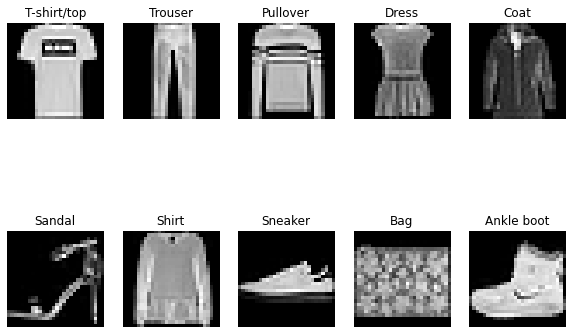

In [ ]:
label=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 7))

rows=2
columns=5
fig = plt.figure(figsize=(10, 7))

for i,j in enumerate(indices):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(train_X[j],cmap ="gray")
        plt.axis('off')
        plt.title(label[i])


In [ ]:
import wandb


In [ ]:

!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:

wandb.init(project="DL-assignment1")
items,indices=np.unique(train_y,return_index=True)
labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

images = []
label = []
for i in (indices):
    images.append(train_X[i])
    label.append(labels[train_y[i]])
wandb.log({"Sample Image": [wandb.Image(img, caption=lbl) for img,lbl in zip(images, label)]})




In [ ]:
#splitting train_X into training and validation set
X_train,X_validation=train_test_split(train_X,test_size=0.1,random_state=21,shuffle=True)
print("training data set:",X_train.shape,"\nvalidation data set:",X_validation.shape)
y_train,y_validation=train_test_split(train_y,test_size=0.1,random_state=21,shuffle=True)
print(y_train.shape,y_validation.shape)


training data set: (54000, 28, 28) 
validation data set: (6000, 28, 28)
(54000,) (6000,)


In [ ]:
#making 2-D data matrix
X = np.array([itr.flatten() for itr in X_train])/255.0
X_test=np.array([itr.flatten() for itr in test_X])/255.0
validation_X=np.array([itr.flatten() for itr in X_validation])/255.0
#normalizing pixel
#train_X,test_X=train_X/255.0,test_X/255.


In [ ]:
print(X.shape)
print(X_test.shape)
print(validation_X.shape)

(54000, 784)
(10000, 784)
(6000, 784)


In [ ]:
#one hot encoding for y_train
y_train_one_hot = np.zeros((y_train.shape[0],10))
for i in range(y_train.shape[0]):
  y_train_one_hot[i,y_train[i]] = 1
#one hot encoding for y_validation
y_validation_one_hot = np.zeros((y_validation.shape[0],10))
for i in range(y_validation.shape[0]):
  y_validation_one_hot[i,y_validation[i]] = 1
#one hot encoding for test_y
test_y_one_hot = np.zeros((test_y.shape[0],10))
for i in range(test_y.shape[0]):
  test_y_one_hot[i,test_y[i]] = 1


In [ ]:
input_nodes=X.shape[1]
output_nodes=10
nodes=[input_nodes,10,10,10,output_nodes]
print(len(nodes))

5


In [ ]:
def init_param(nodes):
  layers=len(nodes)
  theta={}

  for i in range(1,layers):
    theta["W"+str(i)]=(np.random.normal(0.0,1,(nodes[i-1],nodes[i])))
    theta["b"+str(i)]=(np.zeros((1,nodes[i])))
  return theta

#activation functions

def sigmoid(x):
  return 1/1+(np.exp(-x))
  
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=1)  
def ReLU(x):
  return np.maximum(0,x)

def sigmoid_prime(x):
  return sigmoid(x)*(1-sigmoid(x))
def Relu_prime(x):
  return 1*(x>0)



In [ ]:
n=init_param(nodes)
len(n)

8

In [ ]:
def feed_forward(x,theta,activation):
  layers=len(theta)//2
  H=[None]
  A=[]
  H[0]=np.array([x])
  abc=H[0]
  for i in range(1,layers+1):
    a=np.dot(abc,theta["W"+str(i)])+theta["b"+str(i)]
    A.append(a)
    if activation=='sigmoid':
      h=sigmoid(a)
      H.append(h)
    elif activation=='ReLU':
      h=ReLU(a)
      H.append(h)
    if i==layers:
      h=softmax(a)
      H.append(h)
    abc=h
  y_hat=H[layers]
  return y_hat,H,A
    


In [ ]:
 theta=init_param(nodes)
 y_hat,H,A=feed_forward(X[0,:],theta,'ReLU')
 #print((y_hat),A,H)


In [ ]:
def back_prop(y_hat,y,H,A,layers,theta):

  grads={}
  
  grads["dA"+str(layers)]=y_hat-y_train_one_hot[i]
  for l in range(layers,0,-1):
    #print(grads["dA"+str(l)].shape)
    grads["dW" + str(l)] = (np.dot(np.array(H[l-1]).T,grads["dA" + str(l)]))
    
    grads["db" + str(l)] = (grads["dA" + str(l)])
    #print(grads["db" + str(l)])

    if l>1:
      grads["dA"+str(l-1)] = np.matmul(grads["dA" + str(l)],theta["W"+str(l)]) * Relu_prime(A[l-1])
  return grads

       

#gradient=back_prop(y_hat,y_train_one_hot,H,A) 
#print(gradient["dW"+str(1)].shape)


In [ ]:
def update(nodes):
  layers=len(nodes)
  update={}

  for i in range(1,layers):
    update["W"+str(i)]=(np.random.normal(0.0,1,(nodes[i-1],nodes[i])))
    update["b"+str(i)]=(np.zeros((1,nodes[i])))
  return update

In [ ]:
def reint_grad(grads,layers):
  for l in range(layers,0,-1):
    #print(grads["dA"+str(l)].shape)
    grads["dW" + str(l)] =0
    
    grads["db" + str(l)] =0
  return grads

In [ ]:
def gradient_decent(type,batch_size,epoch,lr,theta,activation):
  theta=init_param(nodes)
  layers=len(theta)//2
  if type=='sgd':
    for e in range(epoch):
      dw,db,count=0
      for i in range(0,X.shape[0],batch_size):
        y_hat,H,A=feed_forward(X[i:i+batch_size,:],theta,activation)
        del_theta=back_prop(y_hat,y_train_one_hot[i:i+batch_size,:],H,A,layers,theta)

        for l in range(1,layers):
          theta["W"+str(l)]=theta["W"+str(l)]-lr*del_theta["dW"+str(l)]
          theta["b"+str(l)]=theta["b"+str(l)]-lr*del_theta["db"+str(l)]
  elif type=='mgd':
    count=0
    m=0.5   ##this is beta for momentum
    prv_updates=update(nodes)
    for e in range(epoch):
      for i in range(0,X.shape[0],batch_size):
        y_hat,H,A=feed_forward(X[i:i+batch_size,:],theta,activation)
        del_theta=back_prop(y_hat,y_train_one_hot[i:i+batch_size,:],H,A,layers,theta)

        for l in range(1,layers):
          theta["W"+str(l)]=theta["W"+str(l)]-(m*prv_updates["W"+str(l)]+lr*del_theta["dW"+str(l)])
          theta["W"+str(l)]=theta["b"+str(l)]-(m*prv_updates["b"+str(l)]+lr*del_theta["db"+str(l)])
          prv_updates["W"+str(l)]=(m*prv_updates["W"+str(l)]+lr*del_theta["dW"+str(l)])
          prv_updates["b"+str(l)]=(m*prv_updates["b"+str(l)]+lr*del_theta["db"+str(l)])



  elif type=='nag': 
    m=0.5
    theta_look_ahead={}
    prv_updates=update(nodes)
    for e in range(epoch):
      for i in range(0,X.shape[0],batch_size):
        y_hat,H,A=feed_forward(X[i:i+batch_size,:],theta,activation)
        for l in range(1,layers):
          theta_look_ahead["W"+str(l)]=theta["W"+str(l)]-m*prv_update["W"+str(l)]
          theta_look_ahead["b"+str(l)]=theta["b"+str(l)]-m*prv_update["b"+str(l)]


        del_theta=back_prop(y_hat,y_train_one_hot[i:i+batch_size,:],H,A,layers,theta_look_ahead)

        for l in range(1,layers):
          theta["W"+str(l)]=theta["W"+str(l)]-(m*prv_updates["W"+str(l)]+lr*del_theta["dW"+str(l)])
          theta["W"+str(l)]=theta["b"+str(l)]-(m*prv_updates["b"+str(l)]+lr*del_theta["db"+str(l)])
          prv_updates["W"+str(l)]=(m*prv_updates["W"+str(l)]+lr*del_theta["dW"+str(l)])
          prv_updates["b"+str(l)]=(m*prv_updates["b"+str(l)]+lr*del_theta["db"+str(l)])

  elif type=='rmsprop':
    

  











        















  

In [ ]:
  A={}

  for i in range(3):
    A["a"+str(i)]=[i,i+1,i+2] 
  for i in range(3):
    b=A 
A+=b

TypeError: ignored

In [ ]:
A=[[1,2,3],[4,5,6]]
b=[[4,5,6],[5,6,7]]
A=A+b
print(A)

[[1, 2, 3], [4, 5, 6], [4, 5, 6], [5, 6, 7]]


4
3
2
1
